# Getting Started

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from metricx import Metric, Task

In [3]:
task1 = Task(
    name="task-1",
    metrics=[
        Metric(name="auroc", is_higher_better=True),
        Metric(name="fit-time", is_higher_better=False),
    ],
)
task1.report("model-A", {"auroc": 1.0, "fit-time": 0.1})
task1.report("model-A", {"auroc": 0.9, "fit-time": 0.2})
task1.report("model-A", {"auroc": 0.95, "fit-time": 0.2})
task1.report("model-B", {"auroc": 0.0, "fit-time": 0.4})
task1.report("model-B", {"auroc": 0.01, "fit-time": 0.24})
task1.report("model-C", {"auroc": 0.1, "fit-time": 0.5})
task1.to_df()

model                  timestamp  auroc  fit-time
0  model-A 2020-10-19 11:44:24.686896   1.00      0.10
1  model-A 2020-10-19 11:44:24.686933   0.90      0.20
2  model-A 2020-10-19 11:44:24.686960   0.95      0.20
3  model-B 2020-10-19 11:44:24.686985   0.00      0.40
4  model-B 2020-10-19 11:44:24.687009   0.01      0.24
5  model-C 2020-10-19 11:44:24.687032   0.10      0.50

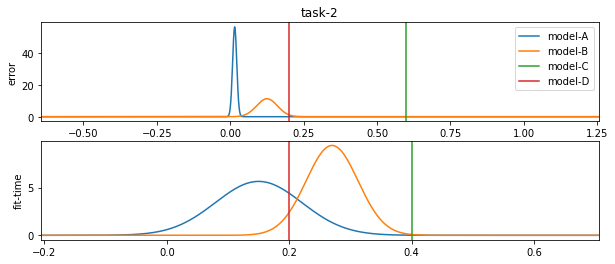

In [4]:
task2 = Task(
    name="task-2",
    metrics=[
        Metric(name="error", is_higher_better=False),
        Metric(name="fit-time", is_higher_better=False),
    ],
)
task2.report("model-A", {"error": 0.02, "fit-time": 0.1})
task2.report("model-A", {"error": 0.01, "fit-time": 0.2})
task2.report("model-B", {"error": 0.1, "fit-time": 0.3})
task2.report("model-B", {"error": 0.15, "fit-time": 0.24})
task2.report("model-C", {"error": 0.6, "fit-time": 0.4})
task2.report("model-D", {"error": 0.2, "fit-time": 0.2})
task2.to_figure();

In [5]:
from metricx import TaskGrid
from bokeh.io import output_notebook, show

output_notebook()
grid = TaskGrid([task1, task2])
show(grid.to_bokeh())

Loading BokehJS ...

In [6]:
grid.to_df()

task    model                  timestamp  auroc  fit-time  error
0  task-1  model-A 2020-10-19 11:44:24.686896   1.00      0.10    NaN
1  task-1  model-A 2020-10-19 11:44:24.686933   0.90      0.20    NaN
2  task-1  model-A 2020-10-19 11:44:24.686960   0.95      0.20    NaN
3  task-1  model-B 2020-10-19 11:44:24.686985   0.00      0.40    NaN
4  task-1  model-B 2020-10-19 11:44:24.687009   0.01      0.24    NaN
5  task-1  model-C 2020-10-19 11:44:24.687032   0.10      0.50    NaN
0  task-2  model-A 2020-10-19 11:44:24.719100    NaN      0.10   0.02
1  task-2  model-A 2020-10-19 11:44:24.719145    NaN      0.20   0.01
2  task-2  model-B 2020-10-19 11:44:24.719176    NaN      0.30   0.10
3  task-2  model-B 2020-10-19 11:44:24.719205    NaN      0.24   0.15
4  task-2  model-C 2020-10-19 11:44:24.719232    NaN      0.40   0.60
5  task-2  model-D 2020-10-19 11:44:24.719261    NaN      0.20   0.20